In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

In [2]:
# Load iris dataset
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
x = iris.data[:,:2]
y = iris.target

In [8]:
# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
dtree = DecisionTreeClassifier(criterion='gini',  max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
from sklearn.metrics import accuracy_score
y_pred_train = dtree.predict(x_train)
y_pred_test = dtree.predict(x_test)
print(f"Training Accuray : {accuracy_score(y_train, y_pred_train)}")

print()

print(f"Test Accuray : {accuracy_score(y_test, y_pred_test)}")

Training Accuray : 0.8

Test Accuray : 0.8333333333333334


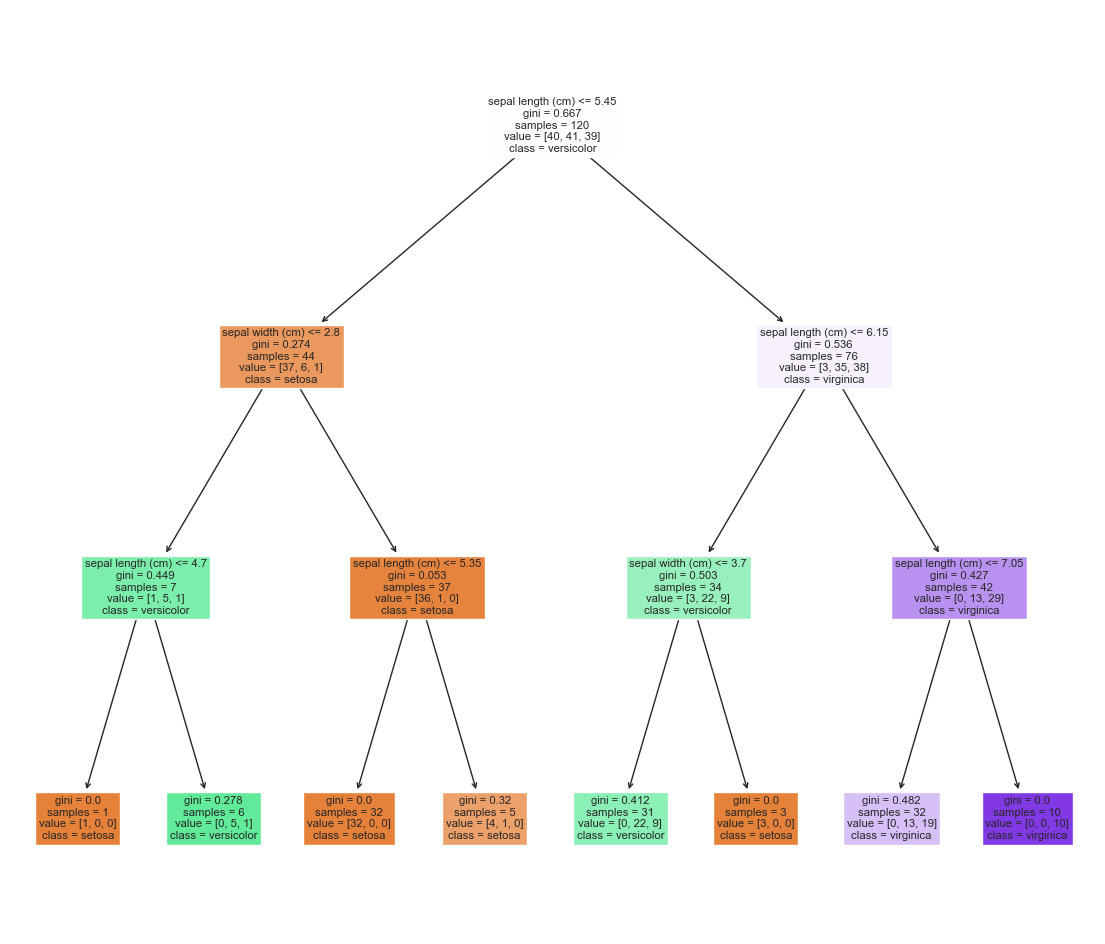

In [34]:
# plot the decisionTree
plt.figure(figsize=(14,12))
plot_tree(dtree, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

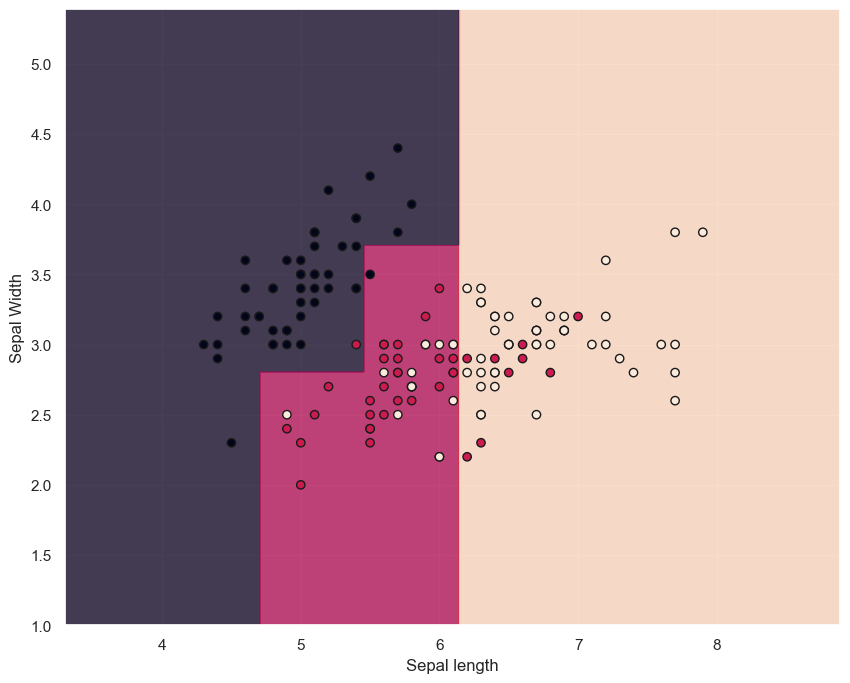

In [26]:
# plot the decision boundary

plt.figure(figsize=(10,8))
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0], x[:,1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.show()

In [27]:
abc = export_text(dtree, feature_names=['sepal_length','sepal_width'])
print(abc)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- sepal_length <= 4.70
|   |   |   |--- class: 0
|   |   |--- sepal_length >  4.70
|   |   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- sepal_length <= 5.35
|   |   |   |--- class: 0
|   |   |--- sepal_length >  5.35
|   |   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- sepal_width <= 3.70
|   |   |   |--- class: 1
|   |   |--- sepal_width >  3.70
|   |   |   |--- class: 0
|   |--- sepal_length >  6.15
|   |   |--- sepal_length <= 7.05
|   |   |   |--- class: 2
|   |   |--- sepal_length >  7.05
|   |   |   |--- class: 2

